In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Make some random BA networks
seed = 14
n = 200
m = 5
N_1 = nx.barabasi_albert_graph(n, m, seed)
N_2 = nx.barabasi_albert_graph(n, m, seed)
N_3 = nx.barabasi_albert_graph(n, m, seed)
N_4 = nx.barabasi_albert_graph(n, m, seed)
N_5 = nx.barabasi_albert_graph(n, m, seed)

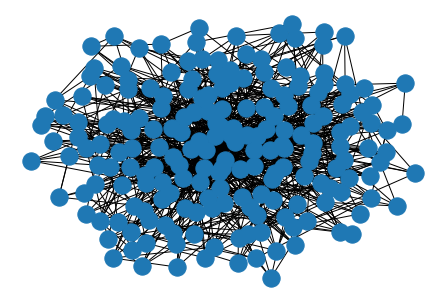

In [3]:
#Visualize
nx.draw(N_1)

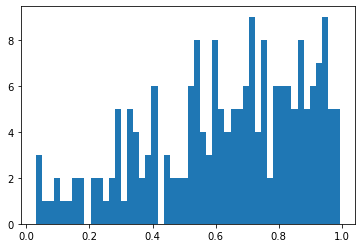

In [4]:
#Initialize opinions for each node
#Question - is there a specific a value I should use? Used 1.75 because that's what was on Geeksforgeeks
initial_opinions = np.random.power(1.75, 200)
plt.figure()
plt.hist(initial_opinions, bins = 50)
plt.show()

In [5]:
#Make the opinions a dictionary
#Make the perceptions a dictionary
#In the beginning, each node's perception is its own opinion
opinions = {}
perceptions = {}
for node in N_1:
    opinions[node] = initial_opinions[node]
    perceptions[node] = initial_opinions[node]

In [6]:
#Assign opinions and perceptions to nodes
nx.set_node_attributes(N_1, opinions, "opinion")
nx.set_node_attributes(N_1, perceptions, "perception")

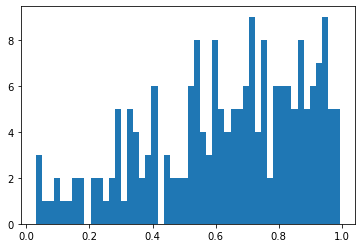

In [7]:
#Visualize initial perceptions
initial_perceptions = initial_opinions
plt.hist(initial_perceptions, bins = 50)
plt.show()

In [8]:
#Expose nodes to opinions
#0 = no opinion, 1 = extreme opinion
#The more extreme an opinion is, the more likely to be recommended
#This first "engine" is incredibly simple - expose each node to the most extreme opinion of their neighbors

for node in N_1.nodes:
    most_extreme_opinion = 0
    for neighbor in N_1.neighbors(node):
        if N_1.nodes[neighbor]['opinion'] > most_extreme_opinion:
            most_extreme_opinion = N_1.nodes[neighbor]['opinion']
    #Now the node's perception is an average of their opinion and the exposed opinion
    perceptions[node] = {"perception": (most_extreme_opinion + N_1.nodes[neighbor]['opinion'])/2}
    N_1.nodes[node]['perception'] = (most_extreme_opinion + N_1.nodes[neighbor]['opinion'])


In [9]:
#Turning the above code into a function
def simulate(network, num_rounds):
    opinions = {}
    perceptions = {}
    for node in network:
        opinions[node] = initial_opinions[node]
        perceptions[node] = initial_opinions[node]
    nx.set_node_attributes(network, opinions, "opinion")
    nx.set_node_attributes(network, perceptions, "perception")
    nx.set_node_attributes(network, perceptions, "perception-sum")
    
    #Run the above "engine" for the specified number of rounds, visualize the distribution each time
    nodes_with_opinions_shared = []
    for i in range(0, num_rounds):
        print("round " + str(i+1))
        perceptions = nx.get_node_attributes(network, "perception")
        
        plt.hist(perceptions.values(), bins = 50)
        plt.show()
        print("hello " + str(i) )
        for node in network.nodes:
            most_extreme_opinion = 0
            for neighbor in network.neighbors(node):
                if network.nodes[neighbor]['opinion'] > most_extreme_opinion and nodes_with_opinions_shared.count(neighbor) == 0:
                    most_extreme_opinion = network.nodes[neighbor]['opinion']
                    nodes_with_opinions_shared.append(neighbor)
            #Now the node's perception is recalculated as an average of all their exposed opinions
            if most_extreme_opinion > 0:
                perception_sum = network.nodes[node]['perception-sum']
                new_perception_sum = perception_sum + most_extreme_opinion
                network.nodes[node]['perception-sum'] = new_perception_sum
            
                if node == 10:
                    print(perception_sum)
                network.nodes[node]['perception'] = perception_sum/(i+2)
            
#For whatever reason, ^this only updates in one round. Going to move on to implementing actual recommendation engine now. 

round 1


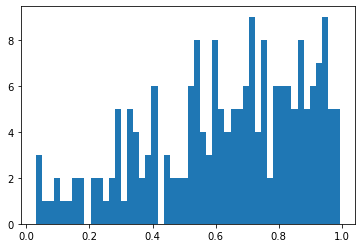

hello 0
0.33972868929052497
round 2


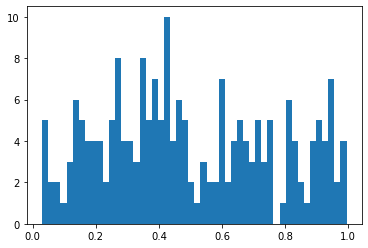

hello 1
round 3


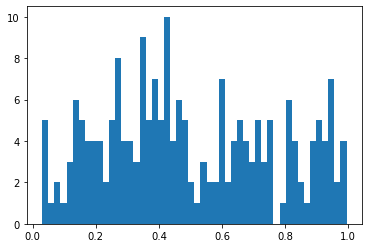

hello 2
round 4


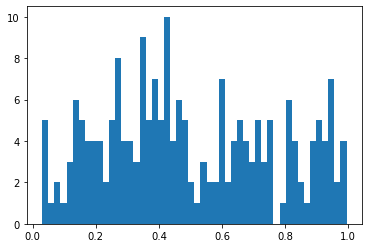

hello 3
round 5


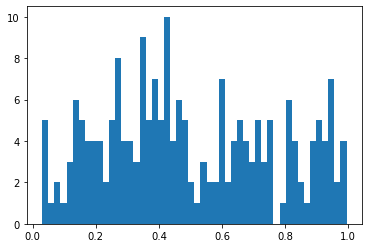

hello 4
round 6


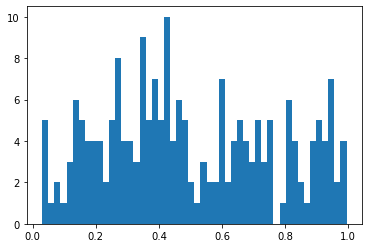

hello 5
round 7


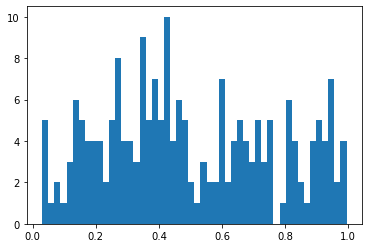

hello 6
round 8


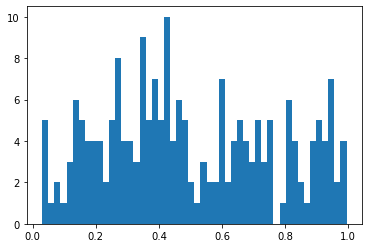

hello 7
round 9


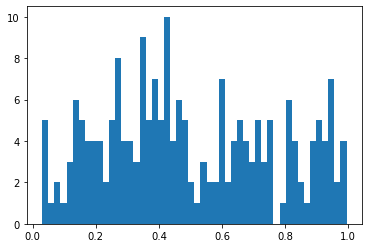

hello 8
round 10


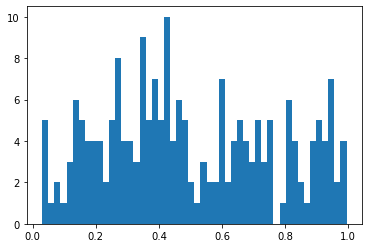

hello 9


In [10]:
#Practice, using N_2 because I haven't been messing with it as much
simulate(N_2, 10)

In [ ]:
#Now to build an actual recommendation engine. Hm. 